In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('B://workspace/tensorflow/')

# 训练 Conv-LSTM 模型。
# 该模型通过同一个月的前 14 天的 SST 数据预测未来 1 天的 SST 数据。

# 导入数据集
from torch.utils.data import DataLoader

# 定义参数
OFFSET = 0
WIDTH = 15
STEP = 1

In [2]:
from numpy import array
from torch.utils.data import random_split

from src.dataset.ERA5 import ERA5SSTDataset
from src.plot.sst import  plot_sst_comparison

def get_lon(lon):
    lon_s = 360 + lon[0] if lon[0] <= 0 else lon[0]
    lon_e = 360 + lon[1] if lon[1] <= 0 else lon[1]
    
    print(lon_s, lon_e)
    
    return [lon_s, lon_e]

def split_data(area):
    lon = array(get_lon(area['lon']))
    lat = array(area['lat']) + 90

    dataset = ERA5SSTDataset(WIDTH, STEP, OFFSET, lon, lat)
    
    train_data_set, val_data_set, test_data_set = random_split(dataset, [0.7, 0.2, 0.1])

    train_dataloader = DataLoader(train_data_set, batch_size=15, shuffle=False)
    val_dataloader = DataLoader(val_data_set, batch_size=15, shuffle=False)
    test_dataloader = DataLoader(test_data_set, batch_size=15, shuffle=True)

    return train_dataloader, val_dataloader, test_dataloader

def get_sst(): 
    lon = array([-180, 180]) + 180
    lat = array([-90, 90]) + 90

    dataset = ERA5SSTDataset(WIDTH, STEP, OFFSET, lon, lat)
    loader = DataLoader(dataset, batch_size=1, shuffle=False)
    
    print(dataset.getTime(dataset.cur))

    fore_, last_ = next(iter(loader))
    print(fore_.shape)

    return last_[0, :, :]

In [ ]:
from src.trainer.transformer import train_transformer_models

models, test_ = train_transformer_models()


b:\workspace\tensorflow\.venv\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
b:\workspace\tensorflow\.venv\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type        | Params | Mode 
----------------------------------------------------------
0 | transformer       | Transformer | 7.4 M  | train
1 | input_projection  | Linear      | 205 K  | train
2 | output_projection | Linear      | 205 K  | train
----------------------------------------------------------
7.8 M     Trainable params
0         

Epoch 0:   0%|          | 0/358 [00:00<?, ?it/s] DEBUG:      已缓存: dict_keys([2011])
DEBUG:      已缓存: dict_keys([2011, 2020])
DEBUG:      已缓存: dict_keys([2011, 2020, 2008])
DEBUG:      已缓存: dict_keys([2011, 2020, 2008, 2017])
DEBUG:      已缓存: dict_keys([2011, 2020, 2008, 2017, 2004])
DEBUG:      已缓存: dict_keys([2011, 2020, 2008, 2017, 2004, 2013])
DEBUG:      已缓存: dict_keys([2011, 2020, 2008, 2017, 2004, 2013, 2005])
DEBUG:      已缓存: dict_keys([2011, 2020, 2008, 2017, 2004, 2013, 2005, 2022])
DEBUG:      已缓存: dict_keys([2011, 2020, 2008, 2017, 2004, 2013, 2005, 2022, 2023])
Epoch 0:   0%|          | 1/358 [01:13<7:17:14,  0.01it/s, v_num=26, train_loss=446.0]DEBUG:      已缓存: dict_keys([2011, 2020, 2008, 2017, 2004, 2013, 2005, 2022, 2023, 2010])
DEBUG:      已缓存: dict_keys([2011, 2020, 2008, 2017, 2004, 2013, 2005, 2022, 2023, 2010, 2016])
DEBUG:      已缓存: dict_keys([2011, 2020, 2008, 2017, 2004, 2013, 2005, 2022, 2023, 2010, 2016, 2019])
DEBUG:      已缓存: dict_keys([2011, 2020, 2008, 201

`Trainer.fit` stopped: `max_epochs=25` reached.


Epoch 24: 100%|██████████| 358/358 [00:24<00:00, 14.46it/s, v_num=26, train_loss=0.582]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
b:\workspace\tensorflow\.venv\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type        | Params | Mode 
----------------------------------------------------------
0 | transformer       | Transformer | 7.4 M  | train
1 | input_projection  | Linear      | 205 K  | train
2 | output_projection | Linear      | 205 K  | train
----------------------------------------------------------
7.8 M     Trainable params
0         Non-trainable params
7.8 M     Total params
31.113    Total estimated model params size (MB)
57        Modules in train mode
0         Modules in eval mode


Epoch 19: 100%|██████████| 358/358 [00:24<00:00, 14.55it/s, v_num=27, train_loss=0.401]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 358/358 [00:24<00:00, 14.55it/s, v_num=27, train_loss=0.401]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type        | Params | Mode 
----------------------------------------------------------
0 | transformer       | Transformer | 7.4 M  | train
1 | input_projection  | Linear      | 205 K  | train
2 | output_projection | Linear      | 205 K  | train
----------------------------------------------------------
7.8 M     Trainable params
0         Non-trainable params
7.8 M     Total params
31.113    Total estimated model params size (MB)
57        Modules in train mode
0         Modules in eval mode


Epoch 14: 100%|██████████| 358/358 [00:25<00:00, 14.14it/s, v_num=28, train_loss=0.203]

`Trainer.fit` stopped: `max_epochs=15` reached.


Epoch 14: 100%|██████████| 358/358 [00:25<00:00, 14.14it/s, v_num=28, train_loss=0.203]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type        | Params | Mode 
----------------------------------------------------------
0 | transformer       | Transformer | 7.4 M  | train
1 | input_projection  | Linear      | 205 K  | train
2 | output_projection | Linear      | 205 K  | train
----------------------------------------------------------
7.8 M     Trainable params
0         Non-trainable params
7.8 M     Total params
31.113    Total estimated model params size (MB)
57        Modules in train mode
0         Modules in eval mode


Epoch 9: 100%|██████████| 358/358 [00:25<00:00, 14.04it/s, v_num=29, train_loss=1.830]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 358/358 [00:25<00:00, 14.04it/s, v_num=29, train_loss=1.830]


200 220
200 220
RMSE: 0.9733062982559204
220 240
220 240
RMSE: 47.51222229003906
70 90
70 90
RMSE: 10.504678726196289
320 340
320 340
RMSE: 2.567725896835327


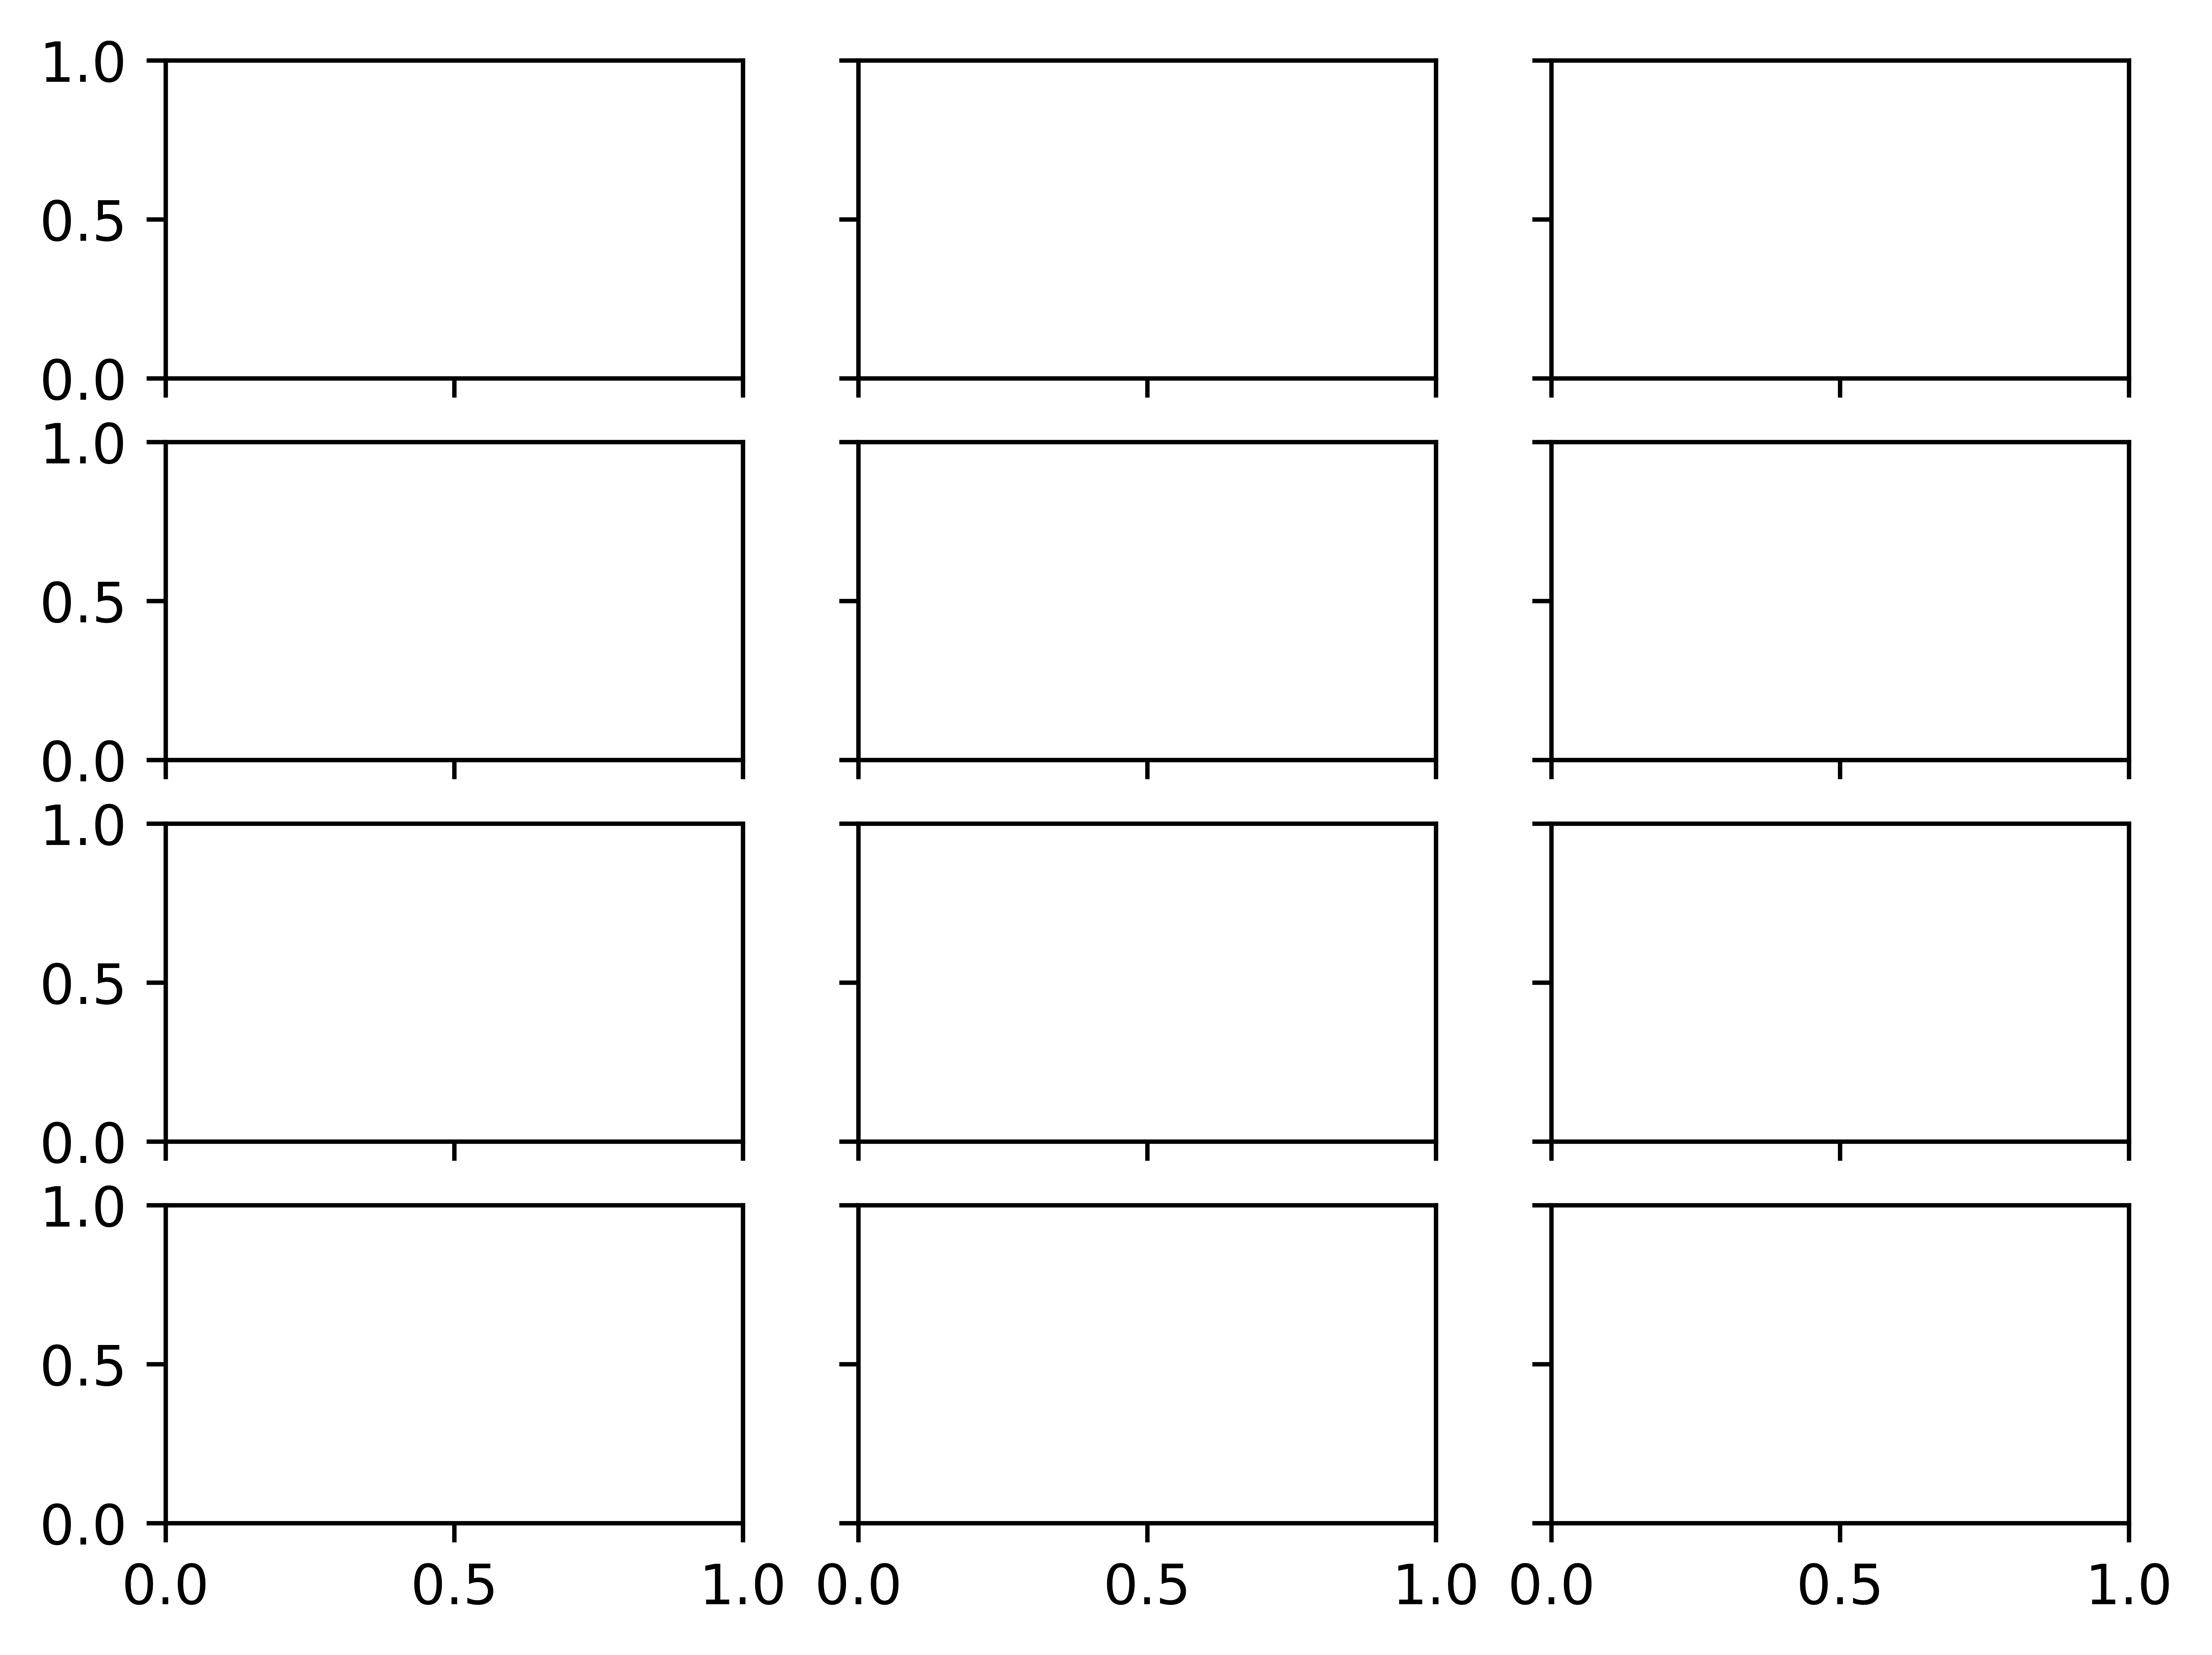

In [ ]:
from sklearn.metrics import mean_squared_error

from src.config.params import Areas
from src.plot.base import create_shared_axes

axes = create_shared_axes(4, 3, 'all')

for i in range(len(Areas)):
    area = Areas[i]
    model = models[i]
    
    train_dataloader, val_dataloader, test_dataloader = split_data(area)

    lon = array(get_lon(area['lon']))
    lat = array(area['lat']) + 90

    x_test, y_test = next(iter(test_dataloader))

    y_pred = model(x_test)

    g = y_pred[0, 0, :, :]
    y = y_test[0, 0, :, :]

    rmse = mean_squared_error(y.detach().numpy(), g.detach().numpy())
    print(f"RMSE: {rmse}")
    plot_sst_comparison(y.detach().numpy(), g.detach().numpy(), lon, lat)